In [1]:
# Dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Training Data
x = []
for i in range(100):
    x.append([[i+j] for j in range(5)])

In [3]:
x[:10]

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],
 [[7], [8], [9], [10], [11]],
 [[8], [9], [10], [11], [12]],
 [[9], [10], [11], [12], [13]]]

In [4]:
# Testing Data
y = []
for i in range(100):
    y.append(i+5)

In [5]:
y[:10]

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [6]:
# Converting into arrays
x, y = np.array(x), np.array(y)

In [7]:
# Normalization
x, y = x/100, y/100

In [8]:
x.shape, y.shape

((100, 5, 1), (100,))

In [9]:
# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
# Modelling
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(1, batch_input_shape=(None, 5, 1), return_sequences=True),
    tf.keras.layers.LSTM(1, return_sequences=False)
])

In [11]:
model.compile(loss='mse',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 1)              12        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Trining
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 4s 55ms/sample - loss: 0.1657 - accuracy: 0.0000e+00 - val_loss: 0.1925 - val_accuracy: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 399us/sample - loss: 0.1613 - accuracy: 0.0000e+00 - val_loss: 0.1871 - val_accuracy: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 399us/sample - loss: 0.1564 - accuracy: 0.0000e+00 - val_loss: 0.1819 - val_accuracy: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 399us/sample - loss: 0.1521 - accuracy: 0.0000e+00 - val_loss: 0.1768 - val_accuracy: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 436us/sample - loss: 0.1479 - accuracy: 0.0000e+00 - val_loss: 0.1718 - val_accuracy: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 411us/sample - loss: 0.1436 - accuracy: 0.0000e+00 - val_loss: 0.1671 - val_accuracy: 0.0000e+00
Epoch 7/400
80/80 [====================

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[:10]

array([[0.7595181 ],
       [0.76867384],
       [0.4194263 ],
       [0.7619476 ],
       [0.78464437],
       [0.19761744],
       [0.45956722],
       [0.7642808 ],
       [0.7250176 ],
       [0.70799077]], dtype=float32)

In [16]:
y_test[:10]

array([0.85, 0.89, 0.38, 0.86, 0.98, 0.22, 0.41, 0.87, 0.74, 0.7 ])

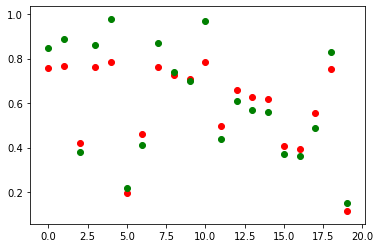

In [17]:
# Prediction
plt.scatter(range(len(y_test)), predictions, c='r')
plt.scatter(range(len(y_test)), y_test, c='g')
plt.show()

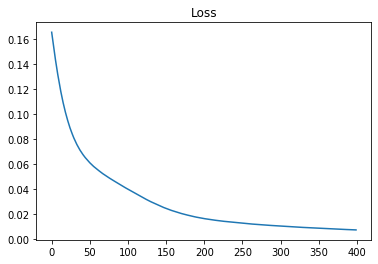

In [18]:
# Optimization
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()